In [181]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json

In [182]:
files = !ls -t *.json
files

['iterations_1e-1_ell_only_20241003-1606.json',
 'iterations_1e-1_ell_only_20241003-1452.json',
 'iterations_1e-1_ell_only_20241003-1420.json',
 'iterations_1e-1_ell_only_20241003-1414.json',
 'iterations_1e-1_ell_only_20241003-1408.json',
 'iterations_1e-1_ell_only_20241003-1400.json',
 'iterations_1e-1_ell_only_20241003-1335.json',
 'iterations_1e-1_ell_only_20241003-1319.json',
 'iterations_1e-1_ell_only_20241003-1315.json',
 'iterations_1e-1_ell_only_20241003-1122.json',
 'iterations_1e-1_ell_only_20241002-1129.json',
 'iterations_1e-1_ell_only_20241002-1113.json',
 'iterations_1e-1_ell_only_20241002-1048.json',
 'iterations_1e-1_ell_only_20241002-1040.json',
 'iterations_1e-1_ell_only_20241002-1026.json',
 'iterations_1e-1_ell_only_20241002-1024.json',
 'iterations_1e-1_ell_only_20241002-1016.json',
 'iterations_1e-1_ell_only_20241002-1014.json',
 'iterations_1e-1_ell_only_20241002-0957.json',
 'iterations_1e-1_ell_only_20241002-0955.json',
 'iterations_1e-1_ell_only_20241002-0954

# Load $\sigma_n$ dictionary

In [183]:
path = os.getcwd()
file = os.path.join(path,files[0])
with open(file, 'r') as f:
    data = json.load(f)

In [184]:
data

{'pde': {'dim': 2,
  'kappa': [0.0, 1.0, 0.8, 0.6, 0.4, 0.5, 0.3, 0.2, 0.1, 0.7],
  'theta': [0.0, 0.4, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1],
  'nu': [0.0, 0.2, 0.15, 0.11, 0.12, 0.1, 0.13, 0.14, 0.14, 0.1],
  'lb': [0.0, 1.5, 1.11, 0.12, 0.13, 0.15, 0.11, 0.12, 0.13, 0.15],
  'rho': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'eta': 0.5,
  'T': 1.0},
 'simulation': {'num_samples': 1024,
  'num_time_intervals': 20,
  'start': 0.9,
  'end': 1.1,
  'num_neurons': 6},
 'optimal': 3.0,
 'bounds': 0.5,
 '0': {'ell': {'min': 0.0,
   'mean': 0.0,
   'median': 0.0,
   'max': 0.0,
   'std': 0.0,
   'bound': 0.0},
  'sigma': {'min': 3.5, 'mean': 3.5, 'median': 3.5, 'max': 3.5, 'std': 0.0}},
 '1': {'ell': {'min': -0.5,
   'mean': -0.10466038756533927,
   'median': -0.07941777392594632,
   'max': 0.5,
   'std': 0.19517259804932777,
   'bound': 0.5},
  'sigma': {'min': 3.0,
   'mean': 3.395339612434661,
   'median': 3.4205822260740537,
   'max': 4.0,
   'std': 0.19517259804932774}},
 '

In [185]:
n = int(list(data.keys())[-1])
n

5

In [186]:
def plot_sigma(data,txt):
    f , ax  = plt.subplots(3,1,figsize=(4,12),dpi=400,sharex = True);
    for i in range(0,n+1):
        if i == 0:
            x0 = np.array([[i+1,data[str(i)]['sigma']['mean']]])
            x1 = np.array([[i+1,data[str(i)]['sigma']['median']]]) 
            x2 = np.array([[i+1,data[str(i)]['sigma']['std']]])        
        elif i == 1:
            x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
            # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
            # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
            x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
            # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
            # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
            x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
            # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
            # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
        else:
            x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
            # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
            # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
            x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
            # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
            # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
            x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
            # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
            # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
    ax[0].plot(x0[:,0],x0[:,1],label = r'$\sigma$',linestyle=':', marker='+')
    # ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
    # ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    ax[0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
    ax[0].set_title(r'Mean $\sigma$');
    # ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
    ax[1].plot(x1[:,0],x1[:,1],label = r'$\sigma$',linestyle=':', marker='+')
    # ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
    # ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    ax[1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
    ax[1].set_title(r'Median $\sigma$');
    ax[2].plot(x2[:,0],x2[:,1],label = r'$\sigma$',linestyle=':', marker='+')
    # ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
    # ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    # ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
    ax[2].set_title(r'STD $\sigma$');
    ax[0].legend(bbox_to_anchor=(.8,0.9));
    plt.savefig('sigma_'+txt+'_'+str(data['pde']['dim'])+'.png');

In [187]:
def plot_ell(data,txt):
    f , ax  = plt.subplots(3,1,figsize=(4,12),dpi=400,sharex = True);
    for i in range(0,n+1):
        if i == 0:
            x0 = np.array([[i+1,data[str(i)]['ell']['mean']]])
            x1 = np.array([[i+1,data[str(i)]['ell']['median']]]) 
            x2 = np.array([[i+1,data[str(i)]['ell']['std']]])        
        elif i == 1:
            x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
            # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
            # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
            x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
            # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
            # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
            x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
            # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
            # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
        else:
            x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
            # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
            # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
            x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
            # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
            # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
            x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
            # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
            # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
    ax[0].plot(x0[:,0],x0[:,1],label = r'$\ell$',linestyle=':', marker='+')
    # ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
    # ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    # ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
    ax[0].set_title(r'Mean $\ell$');
    # ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
    ax[1].plot(x1[:,0],x1[:,1],label = r'$\ell$',linestyle=':', marker='+')
    # ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
    # ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    # ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
    ax[1].set_title(r'Median $\ell$');
    ax[2].plot(x2[:,0],x2[:,1],label = r'$\ell$',linestyle=':', marker='+')
    # ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
    # ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
    # ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
    ax[2].set_title(r'STD $\ell$');
    plt.savefig('ell_'+txt+'_'+str(data['pde']['dim'])+'.png');


/Users/fahim/Documents/GitHub/Deep-Schemes-for-Control/iterations_1e-1_ell_only_20241003-1606.json


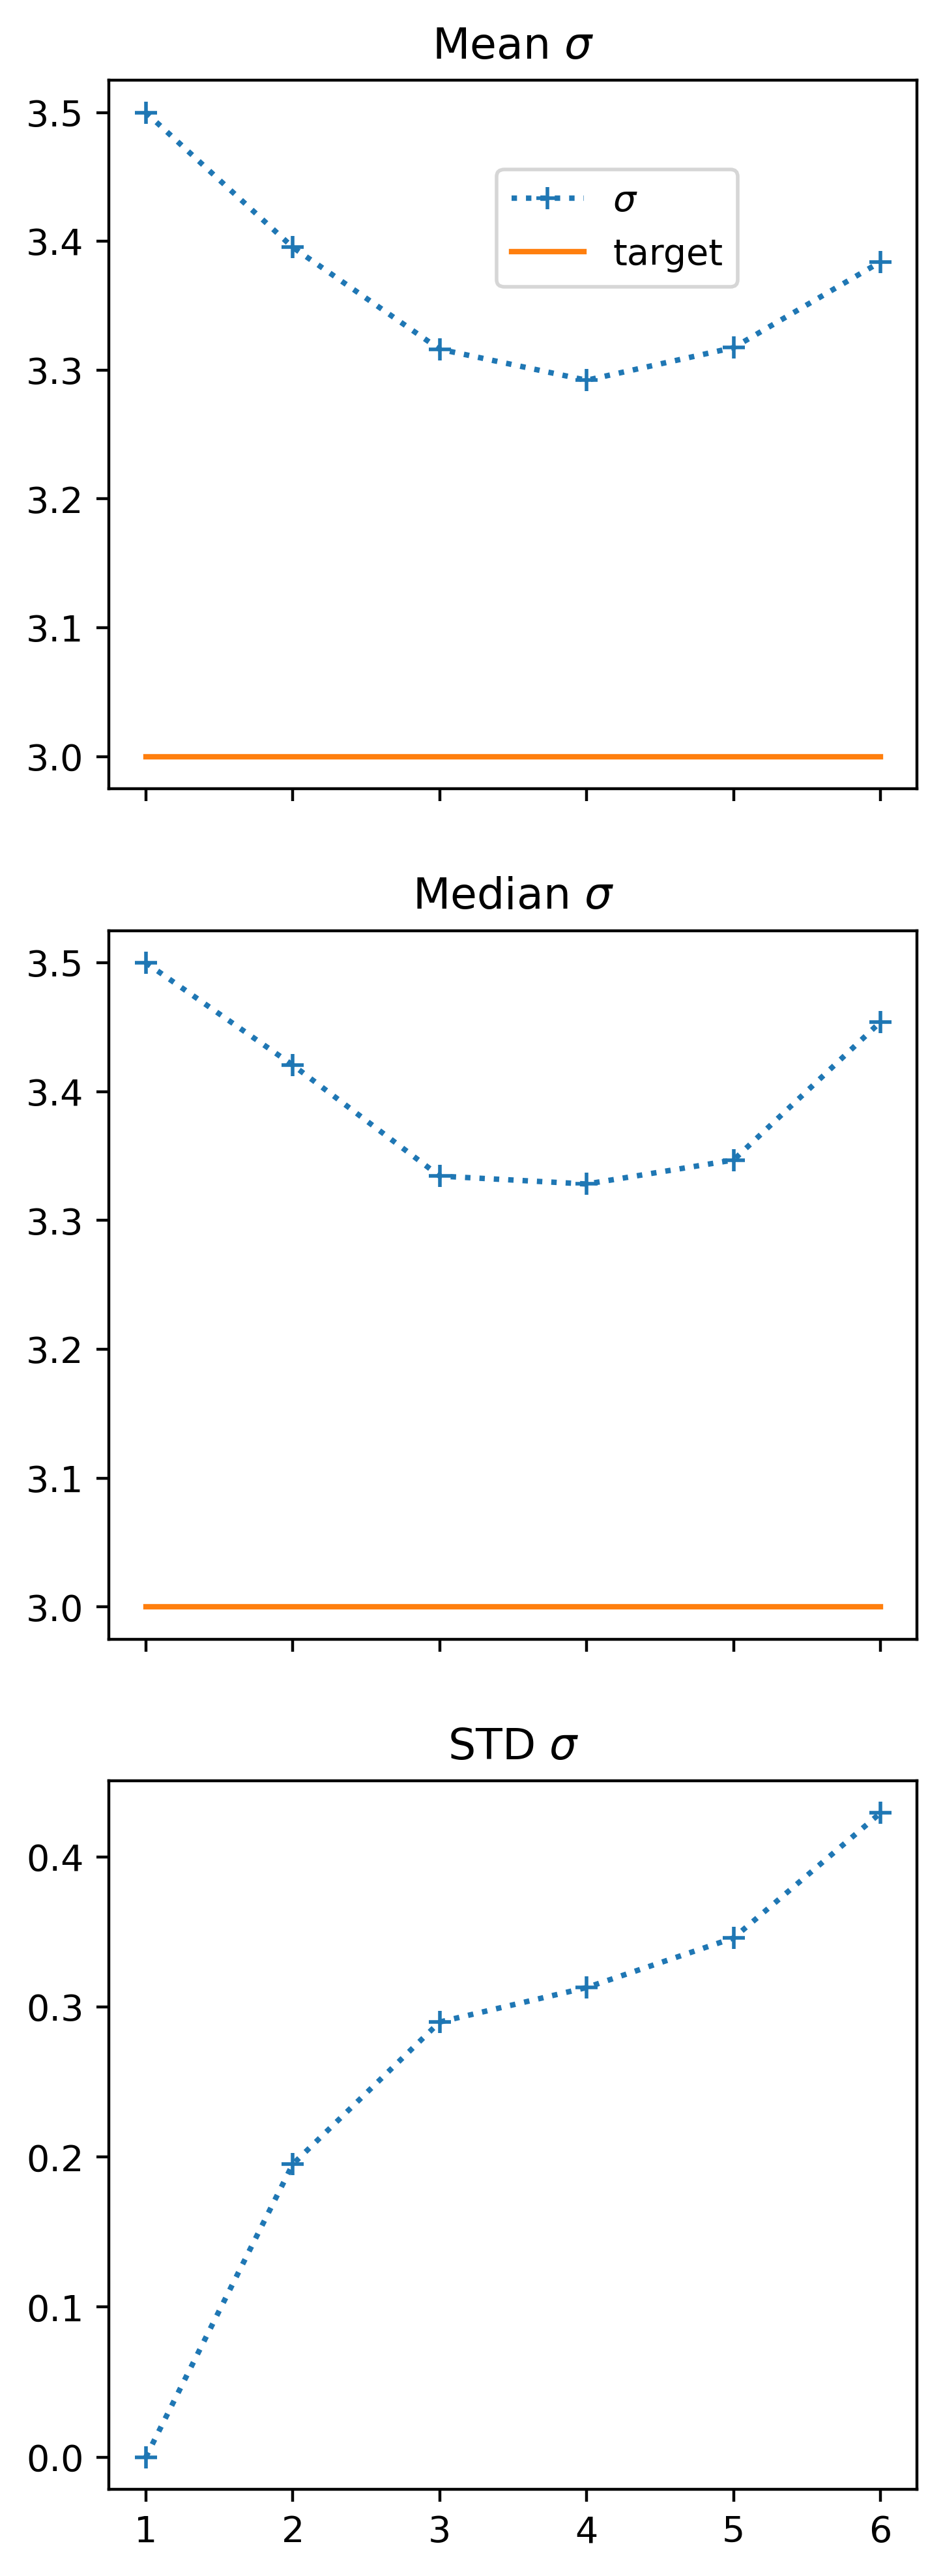

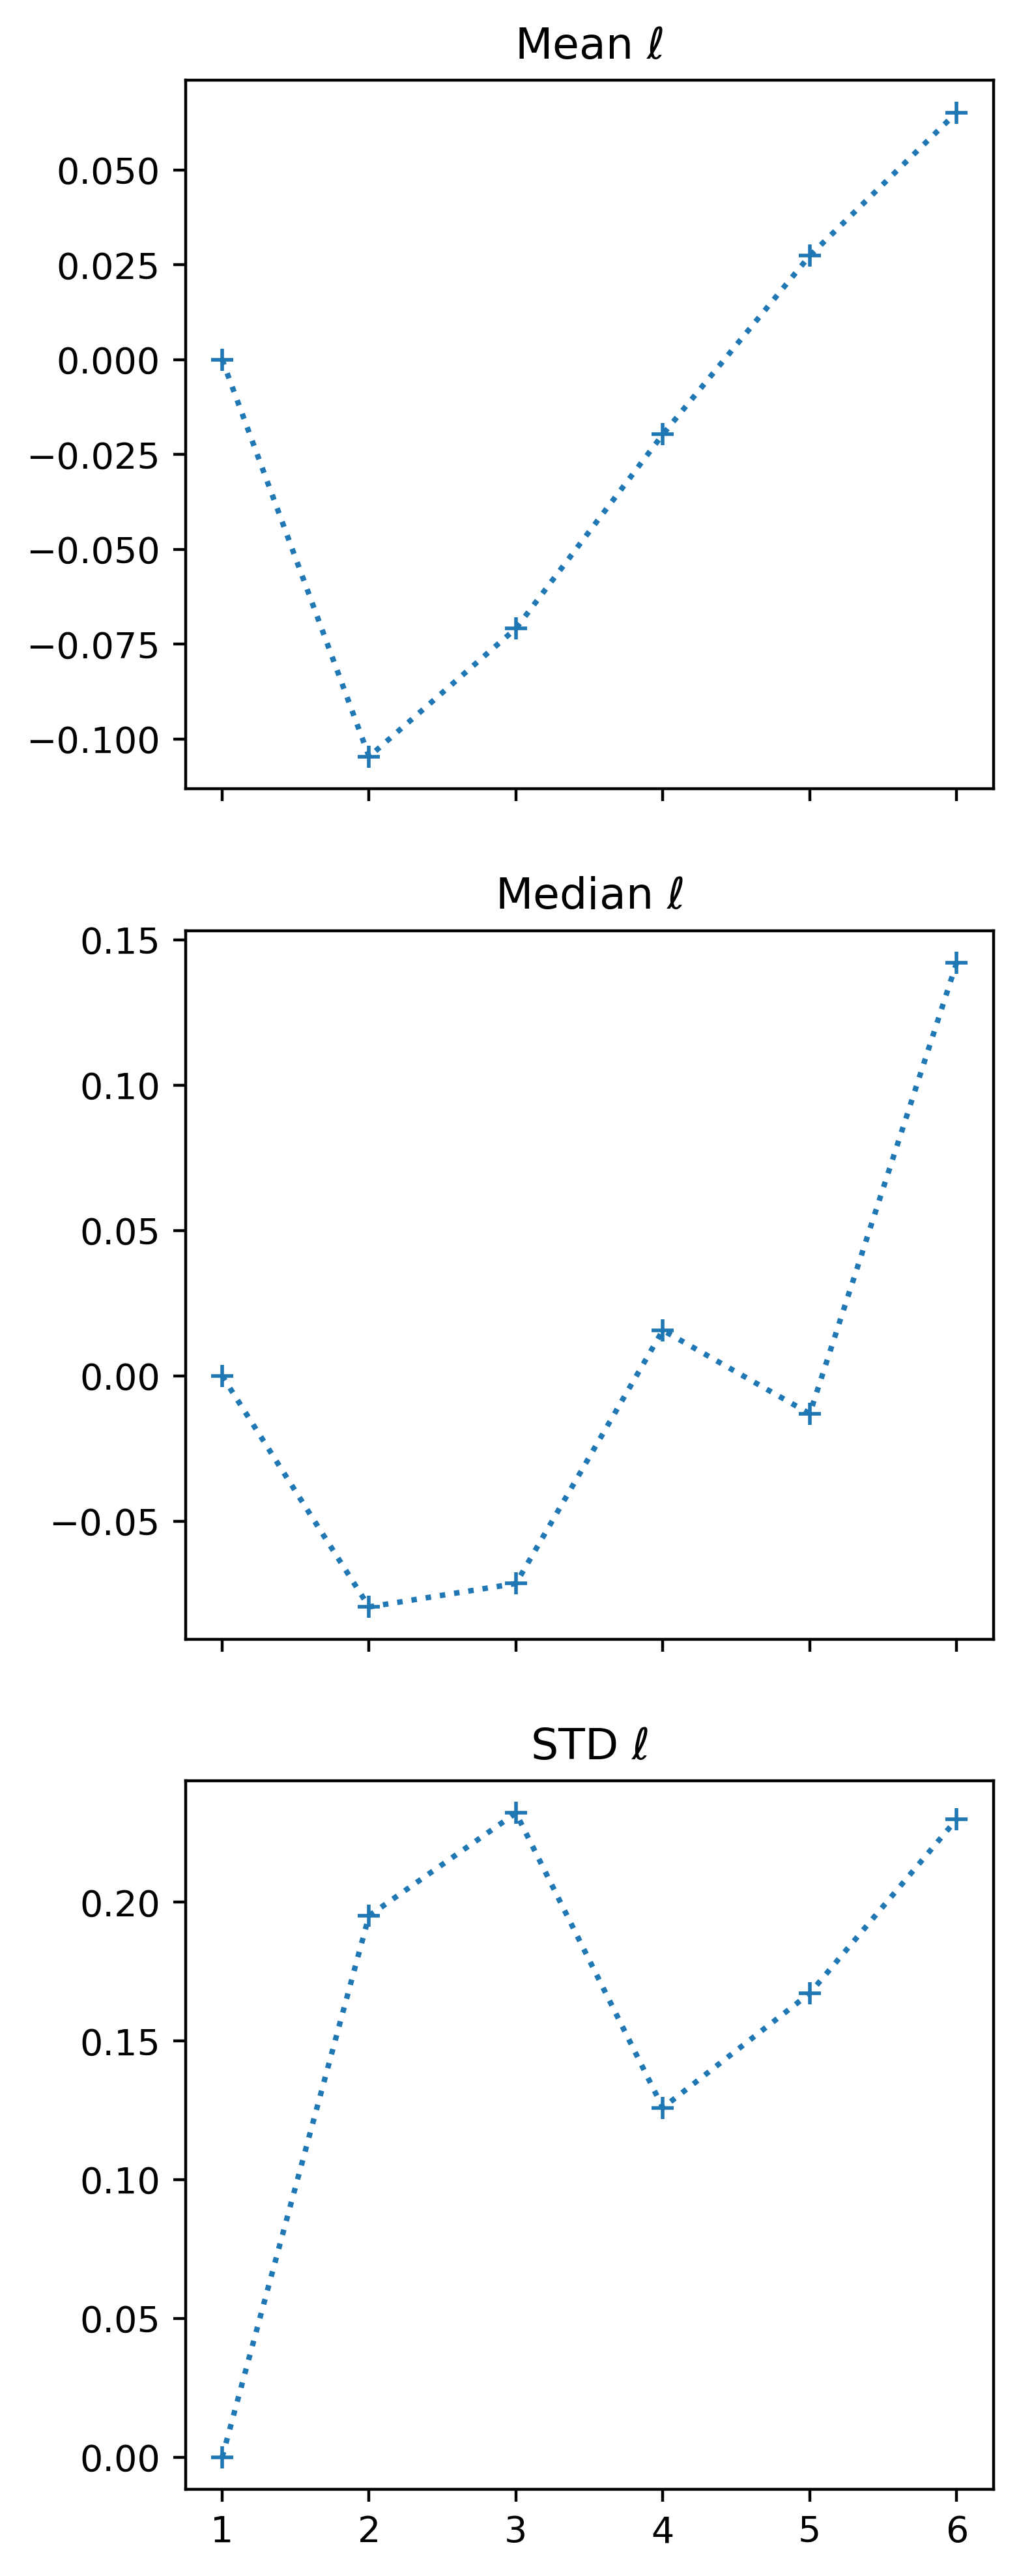

In [188]:
for i  in range(0,1):
    file = os.path.join(path,files[i])
    print(file)
    with open(file, 'r') as f:
        data = json.load(f)
        plot_sigma(data,files[i]);
        plot_ell(data,files[i]);